# LMDZ landice files
https://enacshare.epfl.ch/d9FsbczSYQ43pGhXJCgiW

In [14]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [30]:
path = '/home/lalandmi/data/landice_LMDZ'

landiceref = xr.open_dataset(path+'/landiceref.nc')
landiceref_new = xr.open_dataset(path+'/landiceref_new.nc')

latlim, lonlim = u.get_domain_HMA()
latlim_reversed = slice(latlim.stop, latlim.start) # oposite for LMDZ files

In [16]:
landiceref
# landiceref_new

<xarray.Dataset>
Dimensions:    (latitude: 360, longitude: 360)
Coordinates:
  * longitude  (longitude) float32 -179.5053 -178.50526 ... 178.50526 179.5053
  * latitude   (latitude) float32 89.75265 89.25263 ... -89.25263 -89.75265
Data variables:
    masq       (latitude, longitude) float32 ...
    landice    (latitude, longitude) float32 ...

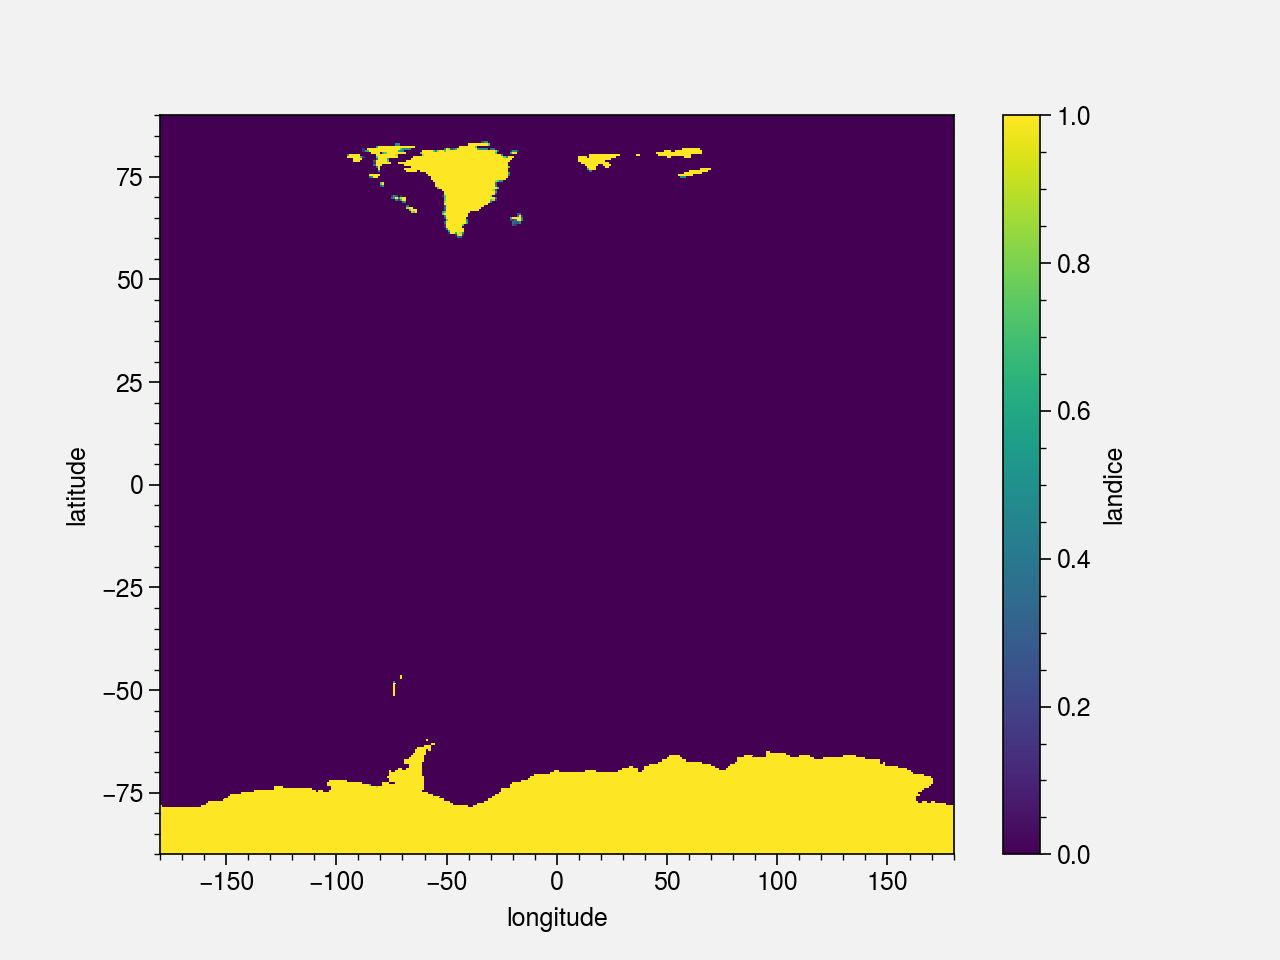

In [11]:
landiceref.landice.plot()

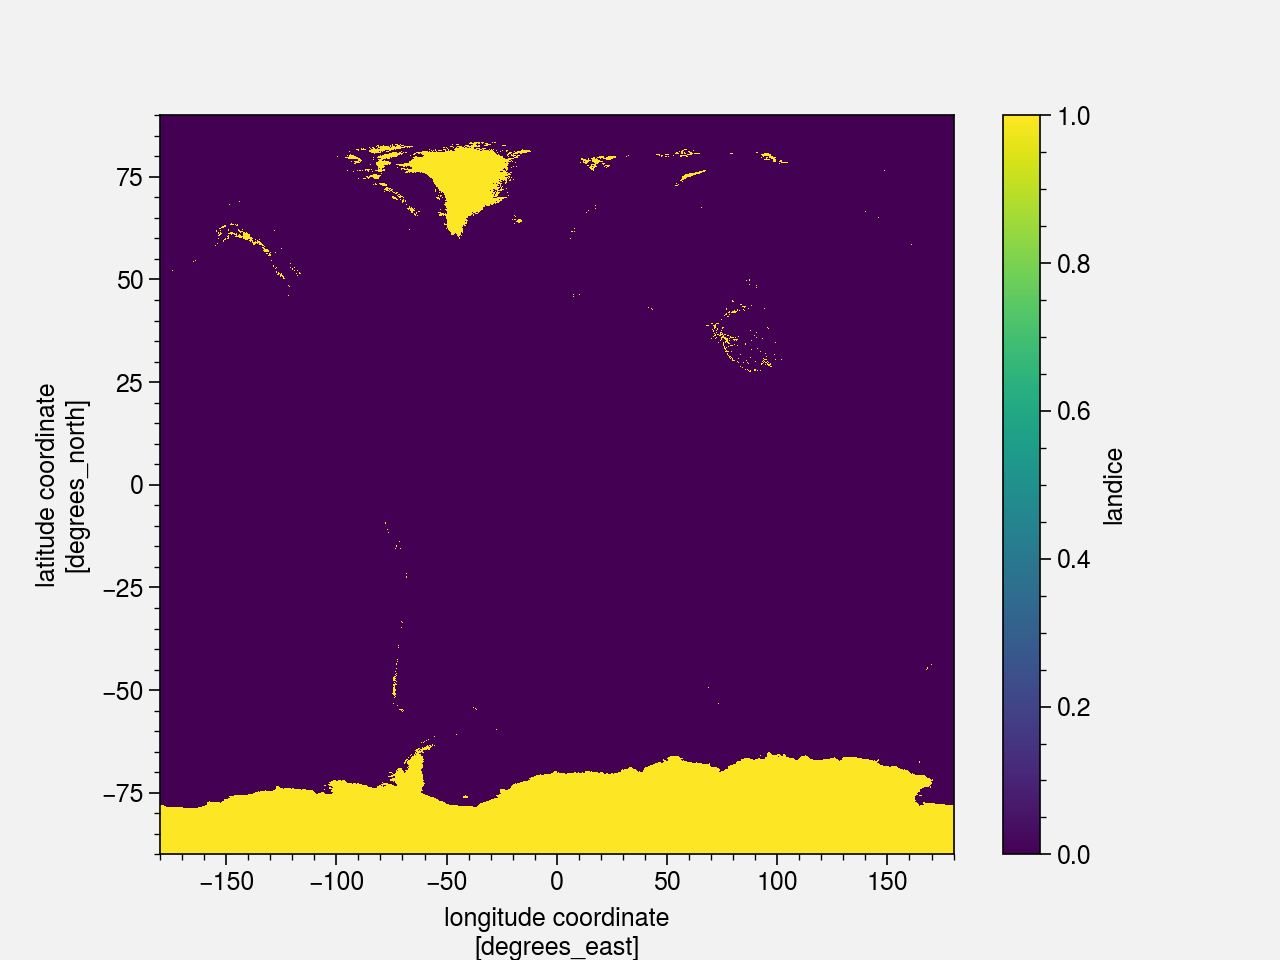

In [12]:
landiceref_new.landice.plot()

In [20]:
latlim = 

slice(20, 45, None)

In [27]:
landiceref_new.sel(longitude=lonlim, latitude=latlim)

<xarray.Dataset>
Dimensions:    (latitude: 0, longitude: 3001)
Coordinates:
  * longitude  (longitude) float32 60.0 60.016666 60.033333 ... 109.98333 110.0
  * latitude   (latitude) float32 
Data variables:
    landice    (latitude, longitude) float64 ...
Attributes:
    history:      Wed Jan  6 15:25:32 2021: ncatted -O -a Comment,global,a,c,...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    Title:        Landice mask for LMDZ simulations
    Authors:      Etienne Vignon and Cecile Agosta
    Institution:  Laboratoire de Meteorologie Dynamique
    Source:       Make from the MAR'landice dataset combined with the RTopo f...
    References:   Schaffer, J., R. Timmermann, J.E. Arndt, S.S. Kristensen C....
    Version:      1.0
    Comment:      note that ice shelves are included in the mask

In [29]:
landiceref_new.landice.sel(longitude=lonlim, latitude=latlim)

<xarray.DataArray 'landice' (latitude: 0, longitude: 3001)>
array([], shape=(0, 3001), dtype=float64)
Coordinates:
  * longitude  (longitude) float32 60.0 60.016666 60.033333 ... 109.98333 110.0
  * latitude   (latitude) float32 
Attributes:
    long_name:  landice

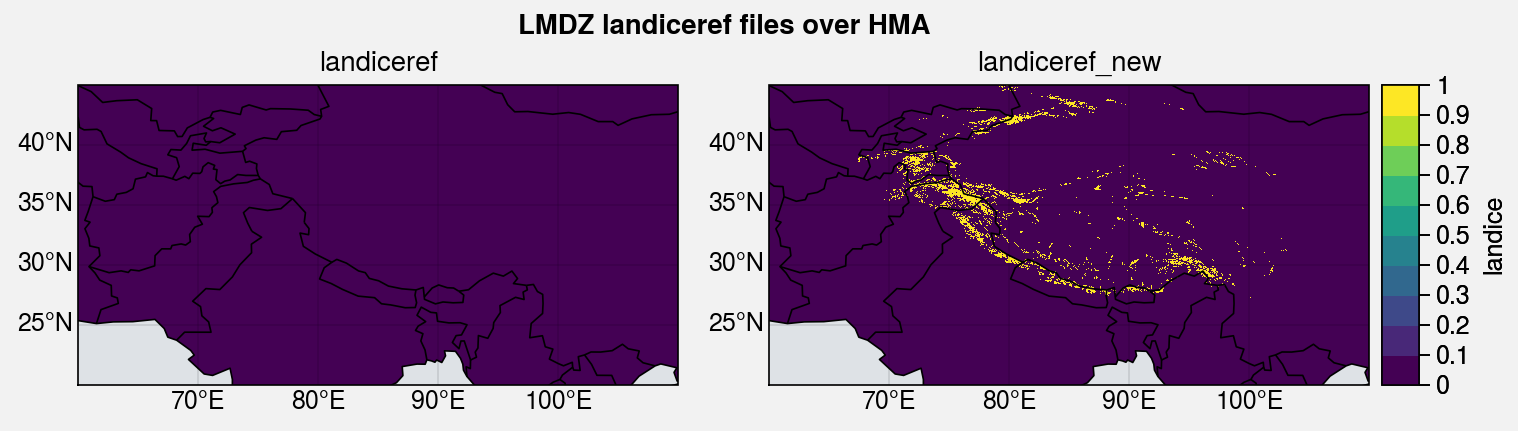

In [41]:
cmap = 'viridis'

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=1, axwidth=3)

axs[0].pcolormesh(
    landiceref.landice.sel(longitude=lonlim, latitude=latlim_reversed), 
    cmap=cmap
)
axs[0].format(title='landiceref')

axs[1].pcolormesh(
    landiceref_new.landice.sel(longitude=lonlim, latitude=latlim), 
    cmap=cmap,
    colorbar='r'
)
axs[1].format(title='landiceref_new')

axs.format(
    labels=True, 
    coast=True,
    borders=True,
    ocean=True, oceancolor='gray3', 
    lonlines=10, latlines=5, 
    latlim=(latlim.start, latlim.stop), 
    lonlim=(lonlim.start, lonlim.stop),
    suptitle='LMDZ landiceref files over HMA'
)

filename = 'LMDZ_landice_HMA'
# f.save('img/'+filename+'.jpg'); f.save('img/'+filename+'.png')